# **Capstone project: Providing data-driven suggestions for HR**

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [16]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay




### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [17]:
df = pd.DataFrame(pd.read_csv("HR_capstone_dataset.csv"))
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [19]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [20]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [21]:
# renaming columns as needed
df = df.rename(columns={"satisfaction_level":"sat_lvl","last_evaluation":"last_eval","number_project":"n_projects","average_monthly_hours":"avg_monthly_hrs","time_spend_company":"tenure","Work_accident":"work_accident","Department":"department"})
df.columns

Index(['sat_lvl', 'last_eval', 'n_projects', 'average_montly_hours', 'tenure',
       'work_accident', 'left', 'promotion_last_5years', 'department',
       'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [22]:
df.isna().sum()

sat_lvl                  0
last_eval                0
n_projects               0
average_montly_hours     0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [23]:
df.duplicated().sum()

3008

In [24]:
df[df.duplicated()].head()

,sat_lvl,last_eval,n_projects,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [25]:
df1 = df.drop_duplicates(keep="first")
df1.head()

,sat_lvl,last_eval,n_projects,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

Text(0.5, 1.0, 'to locate the outliers for tenure')

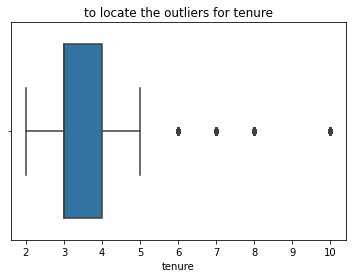

In [26]:
#boxplot that visualizes the distribution of `tenure` and detects any outliers
sns.boxplot(df1["tenure"])
plt.title("to locate the outliers for tenure")

In [27]:
#determines the number of rows containing outliers


q1 = df1["tenure"].quantile(0.25)
q3 = df1["tenure"].quantile(0.75)
iqr = q3-q1

lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

outliers = df1[(df1["tenure"]>upper_limit)|(df["tenure"]<lower_limit)]
print("number of rows containing outliers:",len(outliers))

number of rows containing outliers: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [28]:
#gets the number of people who left vs stayed
print(df1["left"].value_counts())

# gets percentages of people who left vs. stayed
print(df1["left"].value_counts(normalize=True)*100)

0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


83.4% of people stayed, whereas 16.6% of the people left


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

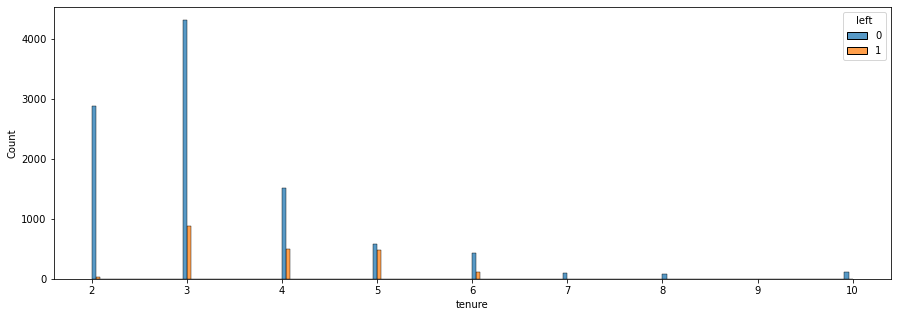

In [29]:
#relation between the peoples tenure and whether they stayed or left
plt.figure(figsize=(15,5))
sns.histplot(x=df1["tenure"],hue=df1["left"], 
             hue_order=[0, 1], multiple='dodge')

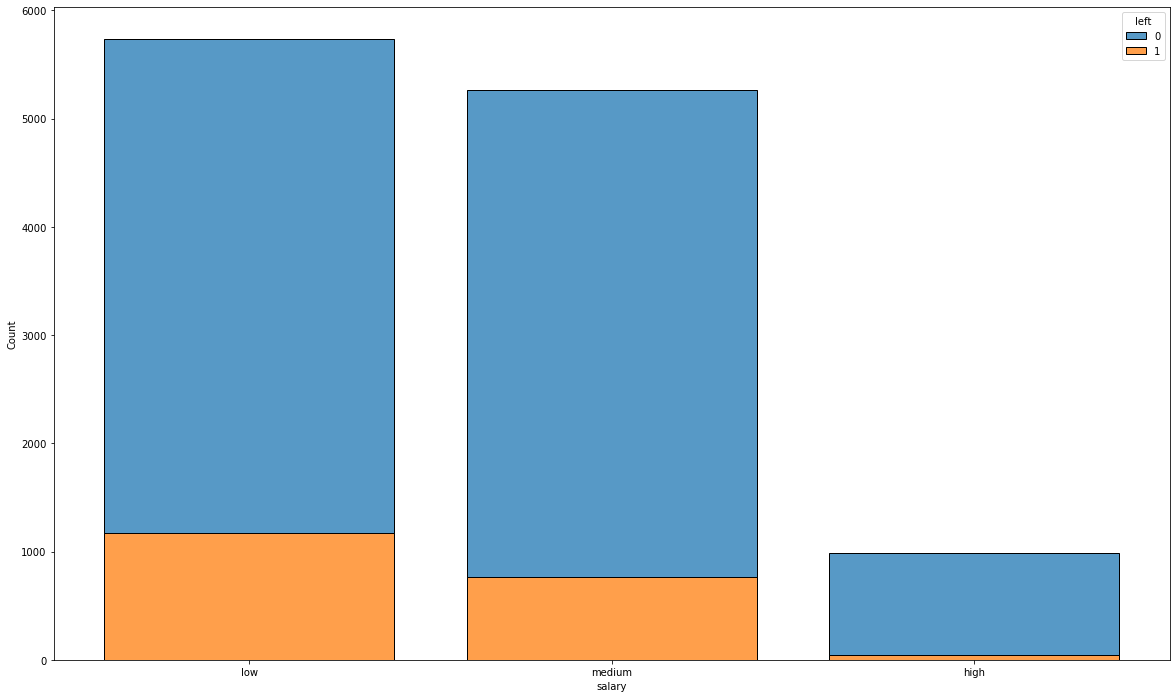

In [30]:
# shows the distribution of people who left vs stayed acc to their salary bands
plt.figure(figsize=(20,12))
sns.histplot(x=df1["salary"],hue=df1["left"], 
             hue_order=[0,1], multiple='stack',shrink=.8)

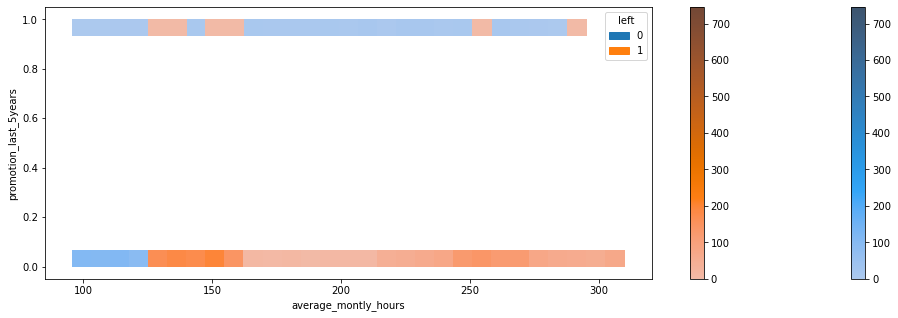

In [31]:
#shows the promotion scheme and the monthly hours of work affect the leaving or staying of employees
plt.figure(figsize=(17,5))
sns.histplot(y=df1["promotion_last_5years"],x=df1["average_montly_hours"],hue=df1["left"], 
             cbar=True)

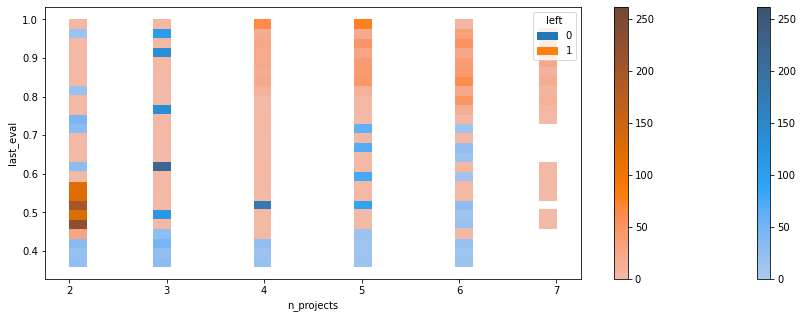

In [32]:
#shows how the recent evaluation scores and number of projects of the employee affects their leaving or staying
plt.figure(figsize=(15,5))
sns.histplot(y=df1["last_eval"],x=df1["n_projects"],hue=df1["left"],cbar=True)


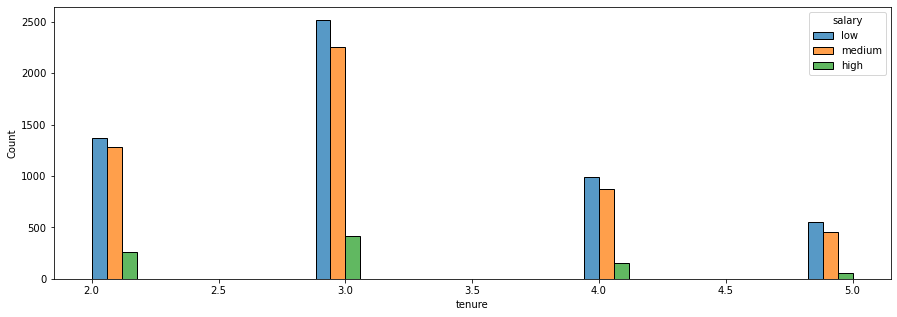

In [33]:
#shows the salary distribution for employees with a tenure less than 6 years
plt.figure(figsize=(15,5))
tenl = df1[df1["tenure"]<6]
tenh = df1[df1["tenure"]>=6]

sns.histplot(x=tenl["tenure"],hue=tenl["salary"], 
             hue_order=["low", "medium","high"], multiple='dodge')


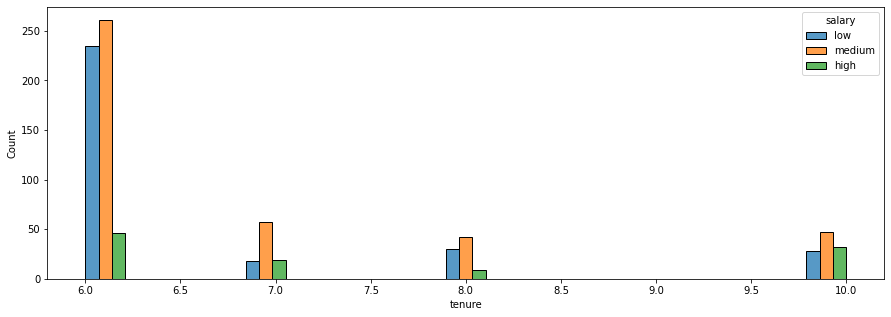

In [34]:
#shows the salary distribution for employees  with a tenure thats greater than or equal to 6 years
plt.figure(figsize=(15,5))
sns.histplot(x=tenh["tenure"],hue=tenh["salary"], 
             hue_order=["low", "medium","high"], multiple='dodge')

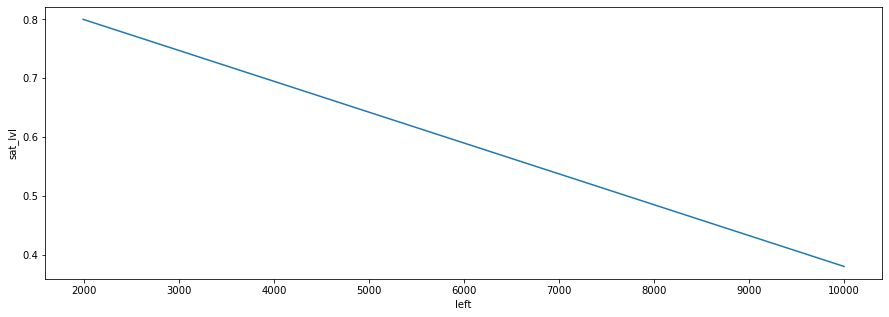

In [35]:
# To show how the amount of employees that leave varies with the employee satisfaction levels
plt.figure(figsize=(15,5))
sns.lineplot(y=df1["sat_lvl"],x=df1["left"].value_counts())

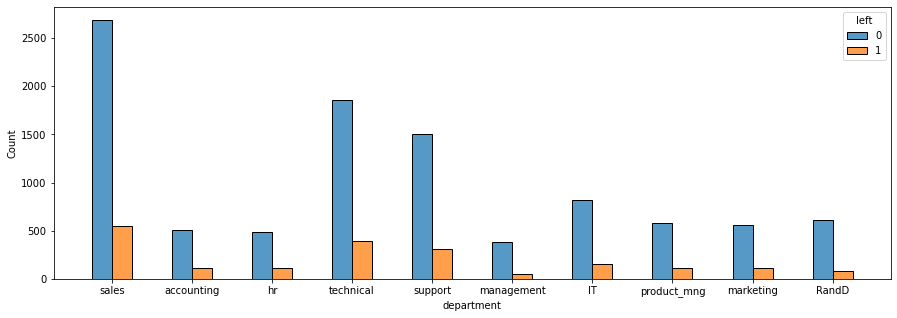

In [36]:
#To show the relation between the department and the number of people that left their jobs
plt.figure(figsize=(15,5))
sns.histplot(x=df1["department"],hue=df1["left"], 
             hue_order=[0,1], multiple='dodge',shrink=.5)

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

Logistic Regression

In [37]:
#encode variables
df1.dtypes

sat_lvl                  float64
last_eval                float64
n_projects                 int64
average_montly_hours       int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [38]:
df1["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [39]:
df1["salary"] = df1["salary"].astype("category").cat.set_categories(['low', 'medium', 'high']).cat.codes
df1.head()

,sat_lvl,last_eval,n_projects,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [40]:
df1= pd.get_dummies(df1)
df1.head(10)

,sat_lvl,last_eval,n_projects,average_montly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
#remove outliers
df_reg  = df1[(df1["tenure"]>=lower_limit)&(df1["tenure"]<=upper_limit)]
df_reg.head(10)

,sat_lvl,last_eval,n_projects,average_montly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
10,0.45,0.54,2,135,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [42]:
#isolate the variables

x = df_reg.drop(["left"],axis=1)
y = df_reg["left"]

In [43]:
#split the data into train and test sets while using stratify to maintain the class balance in the target variable(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=y,random_state=42)

In [44]:
#create logistic regression model
regressor = LogisticRegression(max_iter=1000,random_state=42)
regressor.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
#make predictions for the test data based on the training set
y_pred = regressor.predict(x_test)

In [46]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test,y_pred,target_names = target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



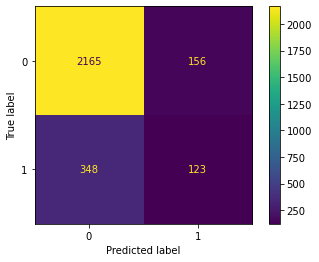

In [47]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=regressor.classes_)
disp.plot(values_format="")
plt.show()

In [48]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier(random_state=0)
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }
scoring = {"accuracy","precision","recall","f1","roc_auc"}

tree_cv = GridSearchCV(tree,cv_params,scoring=scoring,cv=4,refit="roc_auc")


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)
tree_cv.fit(x_train_t,y_train_t)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [50]:
tree_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [51]:
tree_cv.best_score_

0.9743823751317063

In [52]:
tree_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [53]:
tree_best = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
tree_best.fit(x_train_t,y_train_t)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [71]:
cv_results = pd.DataFrame(tree_cv.cv_results_)
for i in ["accuracy","precision","recall","f1","roc_auc"]:
    best_estimator_results = cv_results.iloc[cv_results["mean_test_"+i].idxmax(), :]
results_tree = pd.DataFrame({"accuracy":[best_estimator_results.mean_test_accuracy],"precision":[best_estimator_results.mean_test_precision],
                            "f1":[best_estimator_results.mean_test_f1],"recall":[best_estimator_results.mean_test_recall],
                             "roc_auc":[best_estimator_results.mean_test_roc_auc]})
results_tree

        
    


,accuracy,precision,f1,recall,roc_auc
0,0.978508,0.955522,0.934765,0.91497,0.974382


In [74]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
cv_params_rf = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }
scoring = {"accuracy","precision","recall","f1","roc_auc"}

rfc_cv = GridSearchCV(rfc,cv_params_rf,scoring=scoring,cv=4,refit="roc_auc")
rfc_cv.fit(x_train_t,y_train_t)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [75]:
rfc_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [76]:
rfc_cv.best_score_

0.9818158627884357

In [78]:
rfc_best = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
rfc_best.fit(x_train_t,y_train_t)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [80]:
cv_results_rfc = pd.DataFrame(rfc_cv.cv_results_)
for i in ["accuracy","precision","recall","f1","roc_auc"]:
    best_estimator_results_rfc = cv_results_rfc.iloc[cv_results_rfc["mean_test_"+i].idxmax(), :]
results_rfc = pd.DataFrame({"accuracy":[best_estimator_results_rfc.mean_test_accuracy],"precision":[best_estimator_results_rfc.mean_test_precision],
                            "f1":[best_estimator_results_rfc.mean_test_f1],"recall":[best_estimator_results_rfc.mean_test_recall],
                             "roc_auc":[best_estimator_results_rfc.mean_test_roc_auc]})
results_rfc

,accuracy,precision,f1,recall,roc_auc
0,0.981015,0.970653,0.941924,0.91497,0.981816
